In [9]:
!pip install connectivipy

  Created wheel for connectivipy: filename=connectivipy-0.36-cp36-none-any.whl size=23689 sha256=122775ced573c7cc25d41c786dd431aeb8a6610f24b827680dbdbd7fed17f201
  Stored in directory: /home/banusha/.cache/pip/wheels/83/fd/d8/e1700c85ae7e9fecd3c572e9d4cb9f62b0568f7e962dd19402
Successfully built connectivipy


In [ ]:
!pip install pyEDFlib

In [80]:
!pip install networkx

     |████████████████████████████████| 1.6MB 839kB/s eta 0:00:01


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
import numpy as np
import pyedflib
import pandas as pd
import connectivipy as cp

In [3]:
file_name= 'S038R01.edf'

In [4]:
def read_data_file(file):
    f = pyedflib.EdfReader(file)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    #data=pd.DataFrame(sigbufs).T
    #data.columns=signal_labels
    return signal_labels,sigbufs

In [5]:
labels, data = read_data_file(file_name)

1.1 (mandatory) Estimate functional brain connectivity among 64 channels using one of the
MVAR estimators: Partial Directed Coherence (PDC), Direct Transfer Function (DTF). Select
one relevant frequency value. Apply a threshold so that the resulting binary connectivity
matrices have network density equal to 20%. Create a graphical representation of the binary
adjacency matrix.

https://connectivipy.readthedocs.io/en/latest/tutorial.html

In [6]:
len(labels)

64

In [7]:
data

array([[-54., -33., -22., ...,   0.,   0.,   0.],
       [-73., -62., -52., ...,   0.,   0.,   0.],
       [-55., -46., -43., ...,   0.,   0.,   0.],
       ...,
       [-16.,   6., -23., ...,   0.,   0.,   0.],
       [-26., -15., -45., ...,   0.,   0.,   0.],
       [-24.,  -8., -39., ...,   0.,   0.,   0.]])

In [8]:
dt = cp.Data(data, fs=1., chan_names=labels, data_info='sml')

/home/banusha/nnenv/lib/python3.6/site-packages/connectivipy/data.py:340: Warning: Number of channels > 10.
                          Consider picking only some channels.
  Consider picking only some channels.""", Warning)


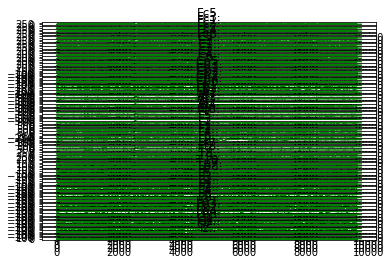

In [9]:
dt.plot_data(trial=0)

In [10]:
dt.fit_mvar(25, 'yw')

In [11]:
ar, vr = dt.mvar_coefficients

In [12]:
ar.shape

(25, 64, 64)

In [13]:
vr.shape

(64, 64)

In [18]:
tr=cp.conn.dtf_fun(ar, vr, fs=1, resolution=1, generalized=False) 
# not sure but i think we need to use this method
# but i dont know what resolution means here???

![](conn.png)

In [22]:
tr[0].shape

(64, 64)

In [23]:
tr[0]

array([[0.05854007, 0.07964089, 0.05862496, ..., 0.07852837, 0.00168141,
        0.04259558],
       [0.10054554, 0.18915894, 0.12501785, ..., 0.08205151, 0.00090517,
        0.04165298],
       [0.06632819, 0.20464993, 0.37686393, ..., 0.08984328, 0.03201369,
        0.07996186],
       ...,
       [0.03512791, 0.1975943 , 0.08673713, ..., 0.62242746, 0.08049304,
        0.18851066],
       [0.1104288 , 0.27119087, 0.14996348, ..., 0.05247056, 0.23144518,
        0.05369688],
       [0.07505918, 0.13363069, 0.11751705, ..., 0.09087804, 0.01398588,
        0.02854595]])

In [26]:
(np.sum(tr[0]>0.13)-64)/(64*63)

0.21329365079365079

In [12]:
gdtf_values = dt.conn('gdtf')

In [13]:
gdtf_values.shape

(100, 64, 64)

In [14]:
gdtf_significance = dt.significance(Nrep=200, alpha=0.05)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . |


In [16]:
gdtf_significance.shape

(64, 64)

In [17]:
gdtf_significance

array([[0.94199358, 0.12408924, 0.12627017, ..., 0.12516971, 0.129931  ,
        0.13240555],
       [0.1207233 , 0.92799486, 0.11986198, ..., 0.11777204, 0.1173422 ,
        0.12042398],
       [0.12082615, 0.11855675, 0.92089783, ..., 0.11012352, 0.11996381,
        0.13283509],
       ...,
       [0.14271819, 0.13060576, 0.15089373, ..., 0.9493374 , 0.11789949,
        0.12757674],
       [0.11793553, 0.13748972, 0.12076001, ..., 0.12710194, 0.93698493,
        0.13353269],
       [0.14337573, 0.13037131, 0.12952765, ..., 0.13050569, 0.14068791,
        0.96697861]])

In [18]:
np.sum(gdtf_significance>0.135)-64

916

In [19]:
adj_matr = 1*(gdtf_significance>0.135)

In [20]:
(np.sum(adj_matr)-64)/(64*63) # density of network

0.2236328125

In [23]:
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

In [21]:
idx_i, inx_j = np.where(adj_matr==1)
idx_i, inx_j = list(idx_i), list(inx_j )
check_symmetric(adj_matr)
Edges = [(idx_i[i],inx_j[i]) for i in range(len(idx_i)) if (idx_i[i]!=inx_j[i])]
our_graph=nx.DiGraph()
our_graph.add_nodes_from(range(0,64))
our_graph.add_edges_from(Edges)
nx.draw(our_graph,with_labels=True)
plt.draw()
plt.show()

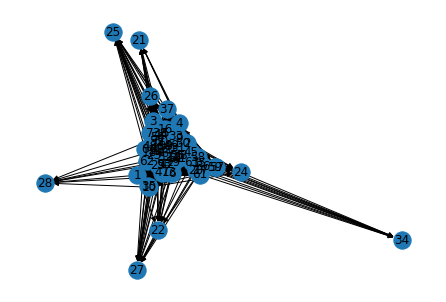

1.4.
(class ‘D’) Considering the subset of 19 channels suggested in Figure 1 and Table 2, estimate
the connectivity using PDC or DTF and apply a statistical validation method (asymptotic
statistics 7 , resampling procedure 8 ,...) to filter out values that are not significantly different
from 0 (PDC(i, j) ≠ 0 with p < 5%)

In [117]:
sub_labels=['Fp1.','Fp2.','F7..','F3..','Fz..','F4..','F8..','T7..','C3..','Cz..','C4..','T8..','P7..','P3..','Pz..','P4..','P8..','O1..','O2..']

In [118]:
len(sub_labels)

19

In [119]:
idx_labels=[labels.index(sub_labels[i]) for i in range(19)]

In [120]:
idx_labels

[21, 23, 29, 31, 33, 35, 37, 40, 8, 10, 12, 41, 46, 48, 50, 52, 54, 60, 62]

In [121]:
data[idx_labels,].shape

(19, 9760)

In [122]:
sub_data = data[idx_labels,]

In [139]:
sub_dt = cp.Data(sub_data, fs=1., chan_names=labels, data_info='sml')

In [140]:
sub_dt.fit_mvar(25, 'yw')

In [141]:
gdtf_values = sub_dt.conn('gdtf')

In [142]:
gdtf_significance = sub_dt.significance(Nrep=200, alpha=0.05)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . |


In [143]:
gdtf_significance.shape

(19, 19)

In [144]:
gdtf_significance

array([[0.97322664, 0.12824948, 0.13212822, 0.13548208, 0.13297231,
        0.1224182 , 0.13733807, 0.13542863, 0.11627233, 0.13868009,
        0.1524274 , 0.11602829, 0.12002176, 0.12846963, 0.13654155,
        0.13520576, 0.14181759, 0.12465511, 0.13409124],
       [0.12270152, 0.9755391 , 0.13027792, 0.13540913, 0.13967639,
        0.12431764, 0.13122959, 0.12211634, 0.1255438 , 0.12436211,
        0.13339815, 0.12071105, 0.12506601, 0.11183088, 0.12842887,
        0.1383412 , 0.14512714, 0.14094367, 0.12835303],
       [0.14439629, 0.1302905 , 0.98333303, 0.13087422, 0.12686963,
        0.14692991, 0.1213748 , 0.1185077 , 0.13344108, 0.13888099,
        0.13206512, 0.12836271, 0.13112615, 0.13210793, 0.14588067,
        0.12466473, 0.13482462, 0.14448815, 0.12147847],
       [0.12109411, 0.14432262, 0.1300535 , 0.98422205, 0.1342072 ,
        0.15650783, 0.12679338, 0.11897625, 0.13442279, 0.13897767,
        0.14224724, 0.12682103, 0.14111154, 0.11628687, 0.13831385,
        0.140

In [145]:
np.sum(gdtf_significance>0.155)-19

21

In [146]:
adj_matr = 1*(gdtf_significance>0.155)

In [147]:
adj_matr

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0,

In [151]:
(np.sum(adj_matr)-19)/(19*18) # density of network

0.06140350877192982

In [149]:
check_symmetric(adj_matr)

False

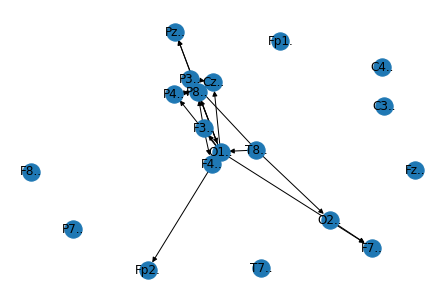

In [150]:
idx_i, inx_j = np.where(adj_matr==1)
idx_i, inx_j = list(idx_i), list(inx_j )
Edges = [(sub_labels[idx_i[i]],sub_labels[inx_j[i]]) for i in range(len(idx_i)) if (idx_i[i]!=inx_j[i])]
our_graph=nx.DiGraph()
#pos=nx.spring_layout(our_graph) 
our_graph.add_nodes_from(sub_labels)
our_graph.add_edges_from(Edges)
#nx.draw_networkx_nodes(our_graph,pos)
nx.draw(our_graph,with_labels=True)
#nx.draw_networkx_labels(our_graph,pos,labels_g,font_size=16)
plt.draw()
plt.show()

In [152]:
sub_data.shape

(19, 9760)

In [154]:
sub_data[1,].shape

(9760,)